# Predicting Heart Disease

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.


**Objective:**

In this project, we are going to accurately predict the likelihood of a new patient having heart disease in the future. 

**Dataset:**

The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before. It has anonymized data from multiple hospitals on several patients. 

You can download the dataset [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).


In [1]:
#importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
#reading the dataset in
heart = pd.read_csv('heart_disease_prediction.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#finding some info about the dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We have 918 observations and 12 features

In [4]:
#displaying the descriptive statistics for the DataFrame
heart.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


Some observations:
* the mean age of the patients is around 53.5 years
* about 55% of patients have heart disease
* max racorded heart rate is 202

In [5]:
#number of null values in each column
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

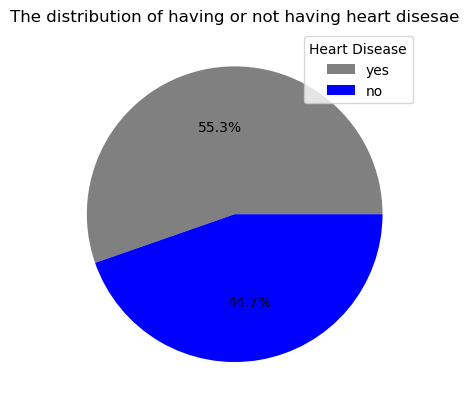

In [6]:
#The distribution of having or not having heart disesae
%matplotlib inline
heart['HeartDisease'].value_counts(normalize = True).plot.pie(autopct = '%.1f%%', colors = ['grey','blue'],labeldistance=None)
plt.ylabel(' ')
plt.legend(labels = ['yes','no'], title = 'Heart Disease')
plt.title('The distribution of having or not having heart disesae')
plt.show()

* More than 50% of patients have heart disease

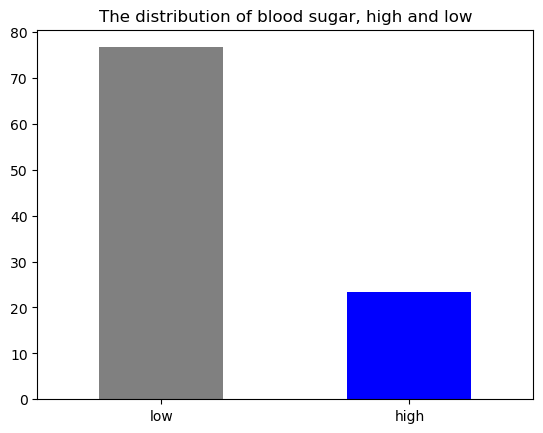

In [7]:
#The distribution of blood sugar, high and low
heart['FastingBS'].value_counts(normalize=True).mul(100).round(1).plot.bar(color = ['grey','blue'])
plt.title('The distribution of blood sugar, high and low')
plt.xticks([0,1],['low','high'], rotation = 0)
plt.show()

* More than 70% of patients have low blood sugar

In [8]:
heart.groupby('FastingBS')['HeartDisease'].mean()

FastingBS
0    0.480114
1    0.794393
Name: HeartDisease, dtype: float64

* Patients with high blood sugar, have heart disease in about 79% of cases, while this number of low blood sugar patients is 48%.

* Patients with ASY chest pain type show a high level of heart disease, about 80% of them.

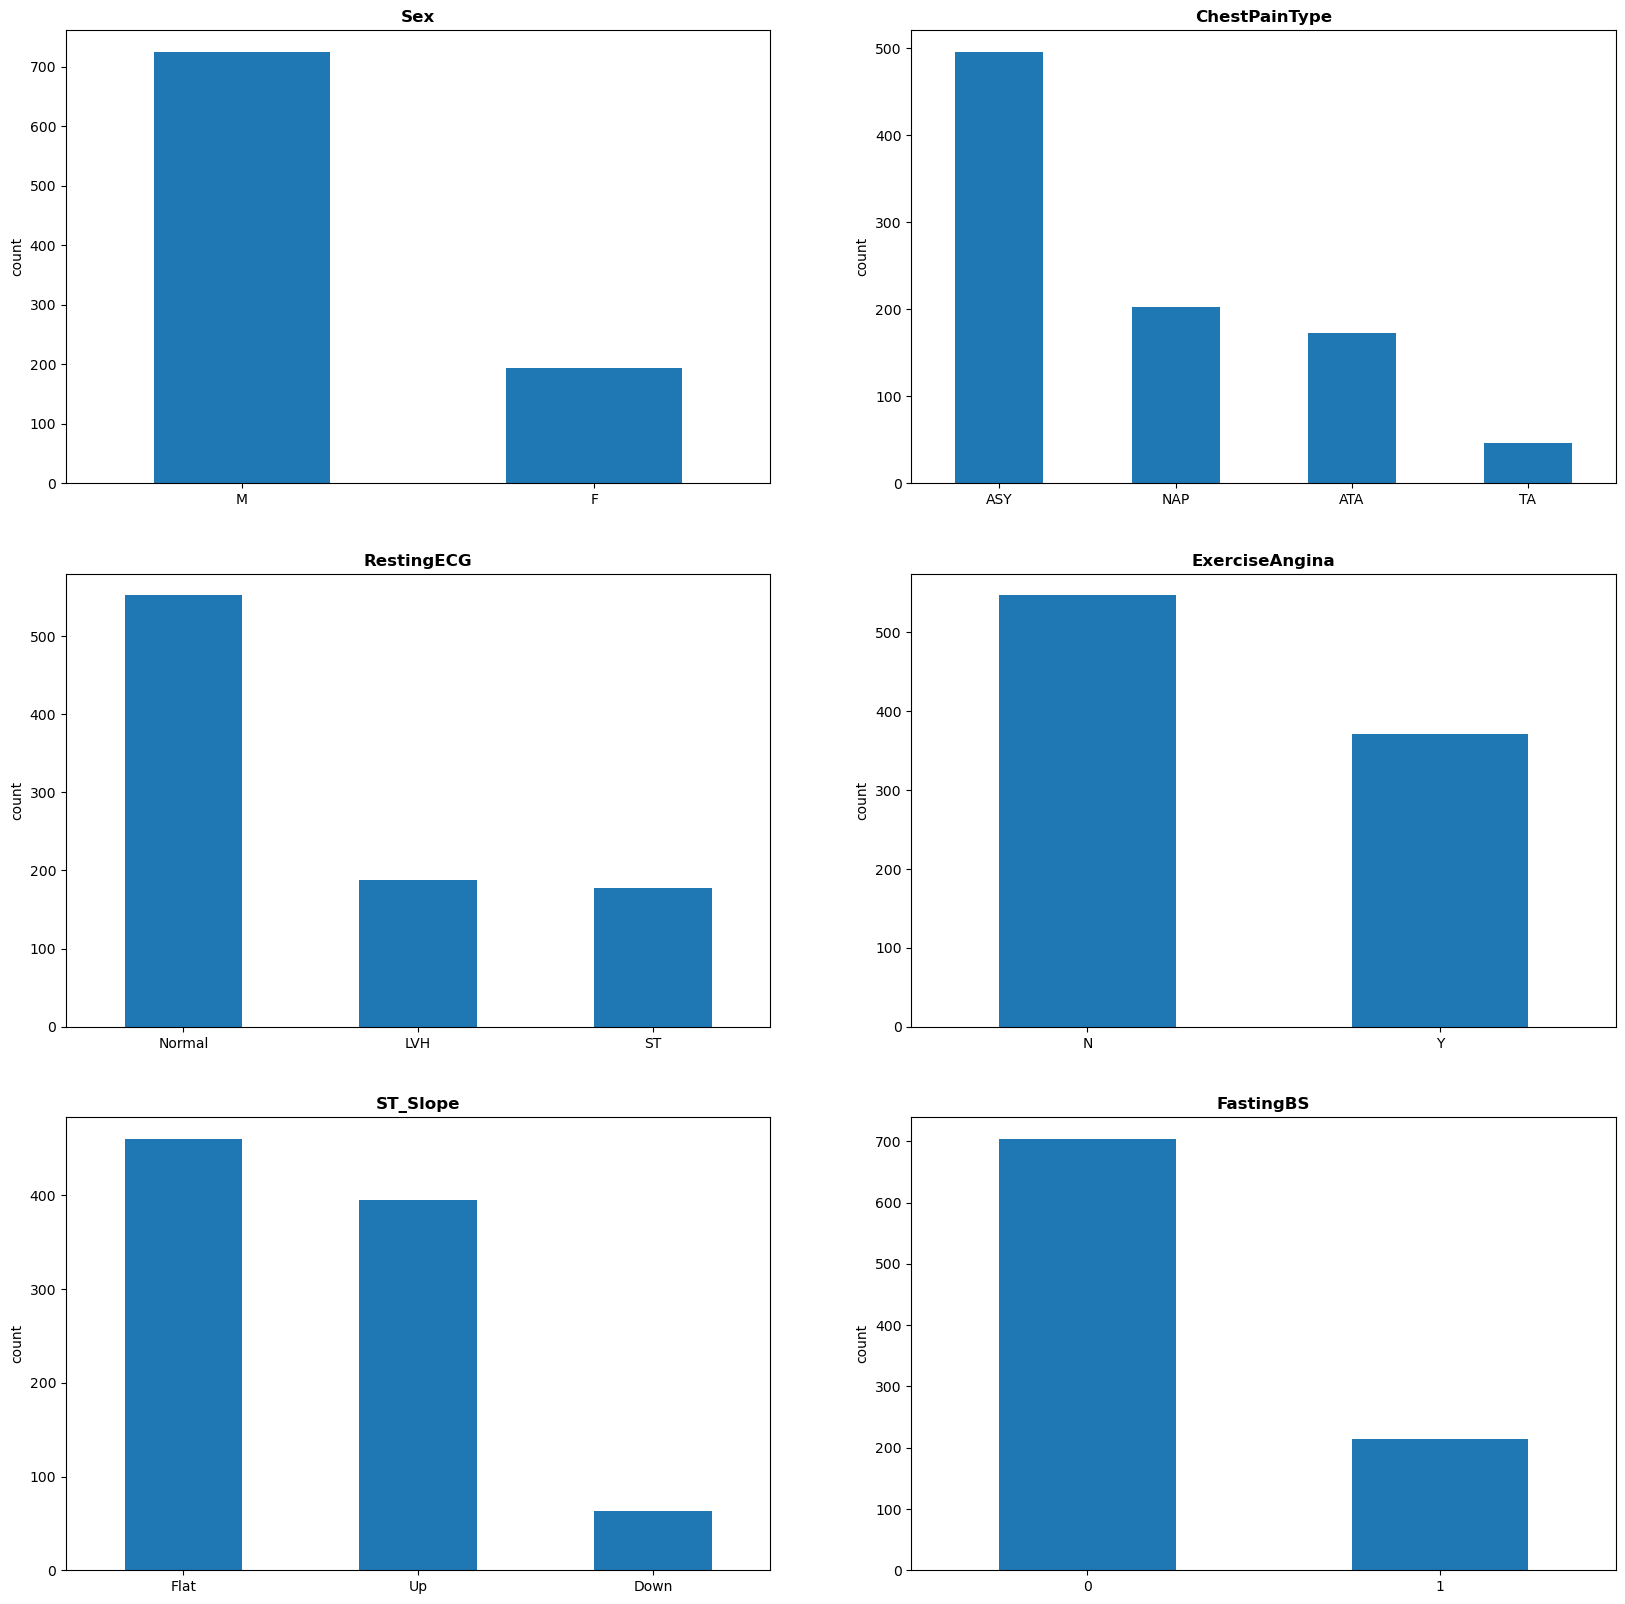

In [9]:
#creating a bar chart for every category showing the number of rows per unique values in each category
categories = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','FastingBS']
plt.figure(figsize = (20,20))

for i,cat in enumerate(categories):
    plt.subplot(3,2,i+1)
    heart[cat].value_counts().plot.bar()
    plt.title(cat, weight = 'bold')
    plt.ylabel('count')
    plt.xticks(rotation = 0)
    
plt.show()

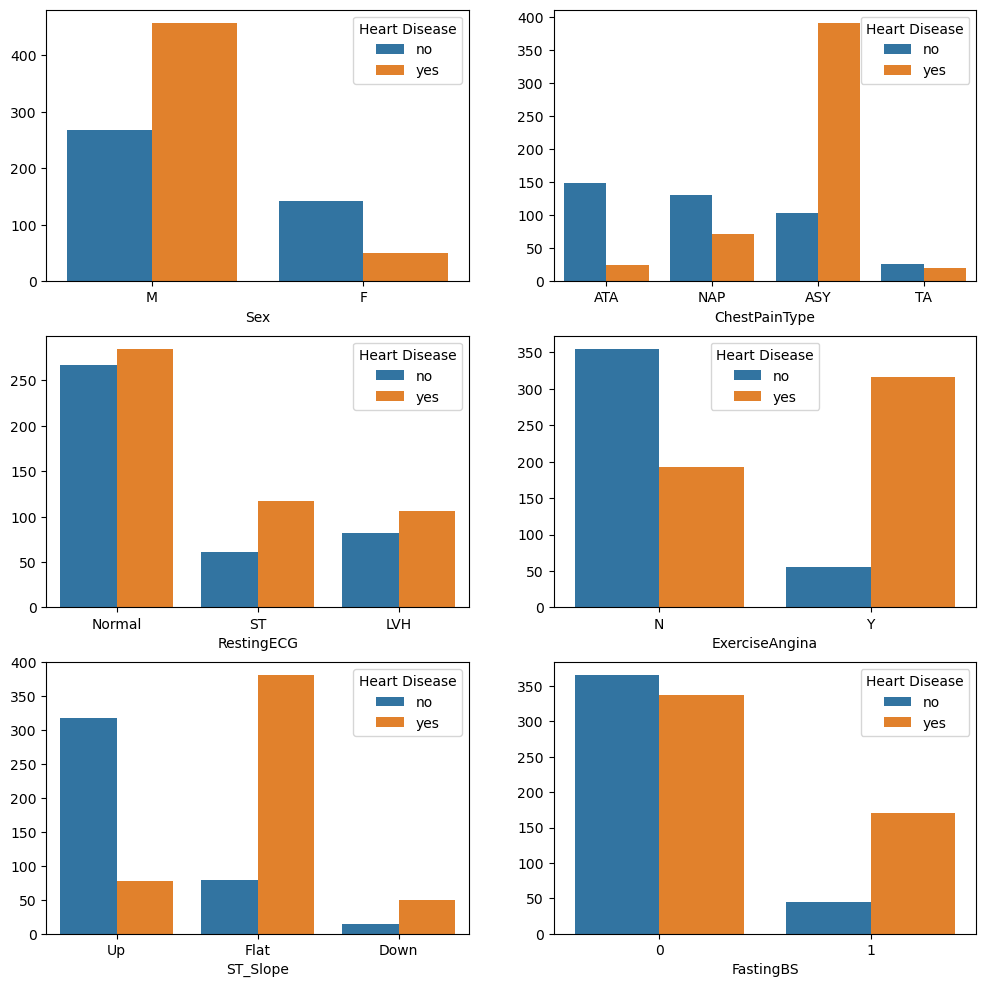

In [10]:
#the distribution of heart disease per value in each category
import seaborn as sns
plt.figure(figsize = (12,12))
for i,cat in enumerate(categories):
    plt.subplot(3,2,i+1)
    sns.countplot(data = heart, x = cat, hue = 'HeartDisease')
    plt.ylabel('')
    plt.legend(labels = ['no','yes'], title = 'Heart Disease')
    
plt.show()

## Data Cleaning

In [11]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
#examining RestingBP and Cholesterol columns
#there shouldn't be 0 values in these columns(domain knowledge)
print("number of 0 values in the RestingBP column: ",(heart['RestingBP']==0).sum())
print("number of 0 values in the Cholesterol column: ", (heart['Cholesterol']==0).sum())


number of 0 values in the RestingBP column:  1
number of 0 values in the Cholesterol column:  172


In [13]:
#since we have only one 0 value in the RestingBP column, 
#we can drop this observation:

heart_clean = heart.drop((heart[heart['RestingBP'] ==0]).index)
(heart_clean['RestingBP']==0).sum()

0

In [14]:
#there are 172 observations in the Cholesterol column with 0 values.
#we replace these values with the median grouped by 
#our target column(HeartDisease)

medians = heart.groupby('HeartDisease')['Cholesterol'].median()
heart_clean['Cholesterol'] = heart_clean.apply(lambda row: medians[row['HeartDisease']] if row['Cholesterol'] == 0 else row['Cholesterol'], axis = 1)
heart_clean['Cholesterol'].value_counts()

217.0    155
227.0     24
254.0     11
220.0     10
223.0     10
        ... 
347.0      1
365.0      1
412.0      1
491.0      1
131.0      1
Name: Cholesterol, Length: 221, dtype: int64

In [15]:
heart_clean[["Cholesterol", "RestingBP"]].describe()


,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


In [16]:
#we have a list of columns that can be cleaned 
# using 3 standard deviation inedex.
std = 3
columns_to_clean=['Age','RestingBP','Cholesterol','MaxHR', 'Oldpeak']
bool = heart_clean[columns_to_clean].apply(lambda cl: abs(cl - cl.mean())/cl.std() < std).all(axis = 1)
bool

0      True
1      True
2      True
3      True
4      True
       ... 
913    True
914    True
915    True
916    True
917    True
Length: 917, dtype: bool

In [17]:
#applying the bool filter on the heart_clean dataframe
print("number of rows before applying the 3 std cleaning rule: ", heart_clean.shape[0])
heart_clean = heart_clean[bool]
print("number of rows after applying the 3 std cleaning rule: ", heart_clean.shape[0])


number of rows before applying the 3 std cleaning rule:  917
number of rows after applying the 3 std cleaning rule:  889


We see that 19 rows were removed after applying the 3 standard deviation cleaning method. 

## Feature selection

In [18]:
#transforming categorical columns into dummy variables, one-hot-coding:
heart_clean = pd.get_dummies(heart_clean,drop_first = True)
heart_clean

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


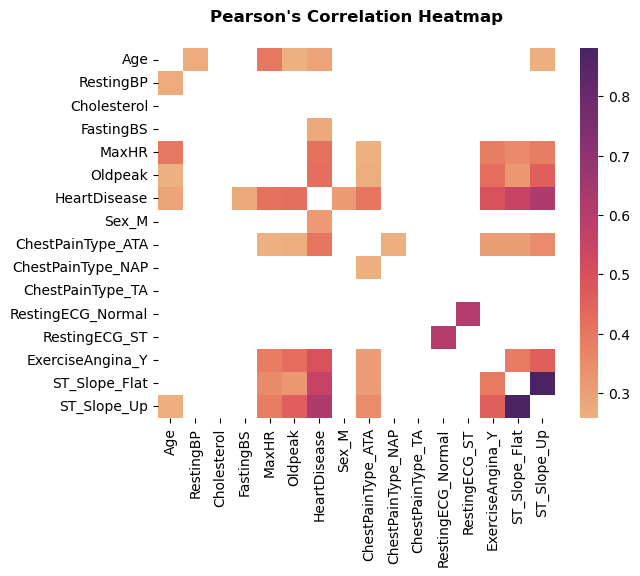

In [19]:
correlations = abs(heart_clean.corr())
sns.heatmap(correlations[(correlations>0.25)&(correlations<1)], cmap = 'flare')
plt.title("Pearson's Correlation Heatmap", weight = 'bold', y = 1.05)
plt.show()

In [20]:
#sorting all features based on their correlation with our 
#target column, ie. HeartDisease
sorted_correlations = correlations['HeartDisease'].sort_values(ascending = False)[1:]
sorted_correlations

ST_Slope_Up          0.620218
ST_Slope_Flat        0.555049
ExerciseAngina_Y     0.498032
Oldpeak              0.419745
MaxHR                0.413037
ChestPainType_ATA    0.401830
Sex_M                0.312465
Age                  0.291546
FastingBS            0.275177
ChestPainType_NAP    0.213119
RestingBP            0.109777
RestingECG_ST        0.101814
RestingECG_Normal    0.092460
ChestPainType_TA     0.047421
Cholesterol          0.017790
Name: HeartDisease, dtype: float64

In [21]:
#we use 0.4 as our threshold to choose between our features
features = sorted_correlations[sorted_correlations>0.4].index.to_list()
features

['ST_Slope_Up',
 'ST_Slope_Flat',
 'ExerciseAngina_Y',
 'Oldpeak',
 'MaxHR',
 'ChestPainType_ATA']

## Building a classifier I

Using the selected features, we first try to find the optimal test size based on accuracy for our model

In [27]:
#creating test and train sets

X = heart_clean[features]
y = heart_clean['HeartDisease']

test_sizes = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 0.8, 0.9]
avg_score = list()
for size in test_sizes:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = size, random_state = 180)
    scores = list()
    for f in features:
        knn = KNeighborsClassifier()
        knn.fit(X_train[[f]],y_train)
        accuracy = knn.score(X_test[[f]],y_test)
        scores.append(accuracy)
    avg = np.average(scores)
    avg_score.append(round(avg*100,2))
    
avg_score


[63.33, 64.04, 68.26, 64.28, 68.66, 69.66, 65.96, 72.21, 72.1, 68.02]

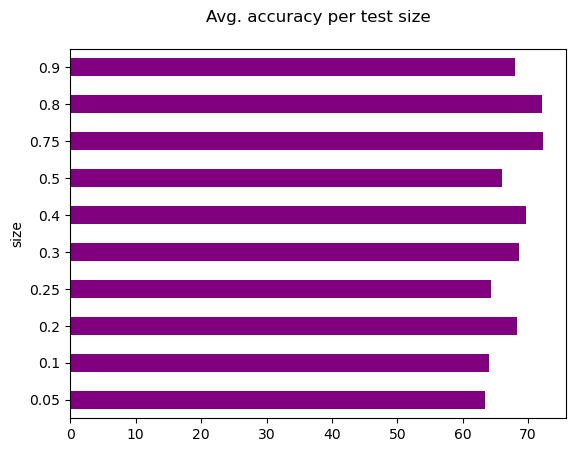

In [38]:
size_accuracy = pd.DataFrame({'size':test_sizes,'avg_accuracy':avg_score})
size_accuracy.plot.barh('size','avg_accuracy',color = 'Purple', legend = False)
plt.title('Avg. accuracy per test size', y = 1.05)
plt.show()


Based on the above chart, 0.2 is a reasonable value that also has a high accuracy score. 

In [41]:
#testing various n_neighbors values in the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 180)

neighbors = list(range(1,101))
average_score = dict()

for n in neighbors:
    mean = list()
    for f in features:
        knn = KNeighborsClassifier(n_neighbors = n)
        knn.fit(X_train[[f]],y_train)
        accuracy = knn.score(X_test[[f]],y_test)
        mean.append(accuracy)
    avg = np.average(mean)
    average_score[n] = round(avg*100,2)

print(average_score)
        

{1: 64.61, 2: 64.51, 3: 65.07, 4: 65.17, 5: 68.26, 6: 68.26, 7: 68.35, 8: 68.16, 9: 68.73, 10: 68.54, 11: 68.54, 12: 68.73, 13: 69.01, 14: 68.73, 15: 68.91, 16: 69.01, 17: 68.73, 18: 68.82, 19: 68.73, 20: 68.82, 21: 68.82, 22: 68.91, 23: 68.82, 24: 69.01, 25: 68.91, 26: 69.01, 27: 69.01, 28: 69.01, 29: 68.82, 30: 68.82, 31: 68.73, 32: 68.73, 33: 69.01, 34: 68.73, 35: 69.01, 36: 68.73, 37: 68.91, 38: 68.73, 39: 68.82, 40: 68.82, 41: 68.82, 42: 68.91, 43: 68.82, 44: 68.91, 45: 68.91, 46: 68.91, 47: 68.63, 48: 68.82, 49: 68.82, 50: 69.1, 51: 68.63, 52: 69.01, 53: 68.82, 54: 69.38, 55: 69.01, 56: 69.29, 57: 69.01, 58: 69.19, 59: 69.19, 60: 69.19, 61: 68.91, 62: 69.19, 63: 69.19, 64: 69.1, 65: 68.82, 66: 69.19, 67: 68.82, 68: 68.82, 69: 68.91, 70: 69.19, 71: 69.1, 72: 69.1, 73: 69.1, 74: 69.1, 75: 69.1, 76: 69.1, 77: 68.82, 78: 68.82, 79: 68.82, 80: 68.82, 81: 68.82, 82: 68.82, 83: 68.82, 84: 68.91, 85: 68.91, 86: 68.91, 87: 69.1, 88: 69.1, 89: 69.19, 90: 69.1, 91: 69.01, 92: 69.01, 93: 69.

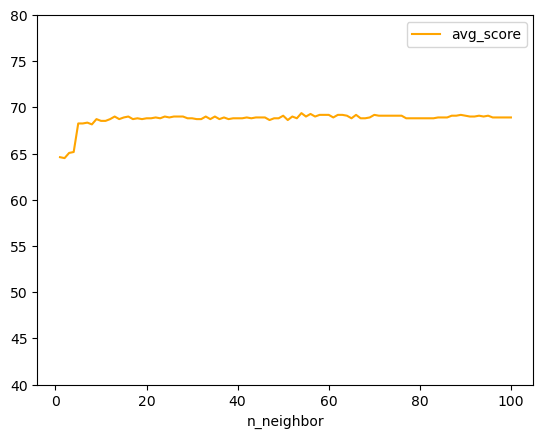

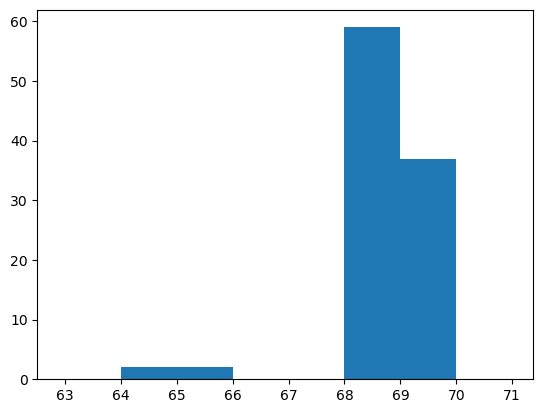

In [61]:
#visualizing average scores
neighbor_scores = pd.DataFrame(list(average_score.items()), 
                              columns = ['n_neighbor','avg_score'])
neighbor_scores.plot.line('n_neighbor', 'avg_score',color = 'Orange')
plt.ylim(40,80)
plt.show()

plt.hist(neighbor_scores['avg_score'],neighbor_scores['n_neighbor'])
plt.xlim((min(neighbor_scores['avg_score'])-2),
         max(neighbor_scores['avg_score'])+2)
plt.show()

Most accuracy values are in the (68,70] range. 

## Building a classifier II

This time, we are going to apply minmax sclaing method to build a more accurate classifier 

In [67]:
#using minmax scaling method:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
accuracy = knn.score(X_test_scaled,y_test)
print("model's accuracy is ",round(accuracy*100,2))

model's accuracy is  79.78


* A high increase in model's accuracy from maximum about 70 to 79.78
* We tested various n_neighbor parameters and test sizes previously, but none of them didn't gain this accuracy level

## Hyperparameter Tuning

Using **GridSearchCV**, we try to find the best perofrming parameters in terms of accuracy

In [76]:
#Using GridSearchCV to find best parameters
from sklearn.model_selection import GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 180)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier()

params = {'n_neighbors' : range(5,30), 'weights' :['uniform', 'distance'],
          'metric' :['minkowski','manhattan']}
knn_grid = GridSearchCV(knn,params, scoring = 'accuracy')
knn_grid.fit(X_train_scaled,y_train)

best_params = knn_grid.best_params_
best_score = knn_grid.best_score_
best_estimator = knn_grid.best_estimator_


In [79]:
print(f"best score is {best_score*100:.2f}%\n")
print(f"best parameters are {best_params}\n")
print(f"best estimator is {best_estimator}")

best score is 84.53%

best parameters are {'metric': 'minkowski', 'n_neighbors': 28, 'weights': 'uniform'}

best estimator is KNeighborsClassifier(n_neighbors=28)


* As we can see, based on our feeded parameters, best possible score is 85.67%(which is well above 79.78 in the previous step).

* Also, best estimator is achieved using n_nieghbors = 28. Although it might underfit our model, due to its large value, it is still in an accepatable range in comparison to the number of our featurers and our sample size

## Model Evaluation on Test Set

In [80]:
#applying best estimator on our final test set to measure its accuracy
score = best_estimator.score(X_test_scaled,y_test)
print(f"the final score of our model is {score*100:.2f}%")


the final score of our model is 76.97%


The model was able to obtain an accuracy of 76.97% using the optimal parameters and test size.

## Final Result:
In this project, I used KNN classifier to build a model to predict heart disease using a dataset of patients in hospitals. 
After testing various sample sizes and paramterts, the final accuracy score reached to about 77%, which seems to be an acceptable score. 